In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler
from google.colab import files

uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


In [ ]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 1)
base.shape

(29999, 25)

In [ ]:
base.columns = [
    'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'default payment next month'
]


In [ ]:
print(base.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [ ]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
1,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
2,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
3,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0
4,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,238114.0


In [ ]:
X = base.iloc[:, [1,25]].values
print("1 X")
print(X)

1 X
[[120000.  17077.]
 [ 90000. 101653.]
 [ 50000. 231334.]
 ...
 [ 30000.  70496.]
 [ 80000. 266611.]
 [ 50000. 230874.]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("1 X")
print(X_scaled)

1 X
[[-0.36602017 -0.66601469]
 [-0.59724319 -0.44318903]
 [-0.90554055 -0.10152881]
 ...
 [-1.05968923 -0.5252759 ]
 [-0.67431753 -0.00858731]
 [-0.90554055 -0.10274074]]


In [ ]:
print("1 X.shape")
print(X_scaled.shape)

1 X.shape
(29999, 2)


In [ ]:
print("X.T.shape")
print(X_scaled.T.shape)

X.T.shape
(2, 29999)


In [ ]:
r = fuzz.cluster.cmeans(data=X.T, c=3, m=2, error=0.005, maxiter=1000, init=None)
print("Pusat Cluster:")
print(r[0])

print("Matriks Keanggotaan:")
print(r[1])


Pusat Cluster:
[[ 175794.11674887  491925.97192085]
 [ 308713.94734192 1332264.70838268]
 [ 140110.15035686   80569.1150665 ]]
Matriks Keanggotaan:
[[0.01898793 0.0181399  0.26457449 ... 0.0575217  0.3818777  0.26316881]
 [0.00245877 0.00185404 0.01732116 ... 0.00685059 0.01926971 0.01726483]
 [0.97855331 0.98000605 0.71810435 ... 0.93562771 0.59885259 0.71956635]]


In [ ]:
previsoes_porcentagem = r[1]

In [ ]:
previsoes_porcentagem.shape

(3, 29999)

In [ ]:
previsoes_porcentagem

array([[0.01898793, 0.0181399 , 0.26457449, ..., 0.0575217 , 0.3818777 ,
        0.26316881],
       [0.00245877, 0.00185404, 0.01732116, ..., 0.00685059, 0.01926971,
        0.01726483],
       [0.97855331, 0.98000605, 0.71810435, ..., 0.93562771, 0.59885259,
        0.71956635]])

In [ ]:
previsoes_porcentagem[0][0]

np.float64(0.018987927859874625)

In [ ]:
previsoes_porcentagem[1][0]

np.float64(0.002458765415080921)

In [ ]:
previsoes_porcentagem[2][0]

np.float64(0.9785533067250445)

In [ ]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

np.float64(1.0)

In [ ]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [ ]:
# 3. Pilih dan Standarkan Fitur untuk Clustering
fitur = ['LIMIT_BAL', 'BILL_AMT1']
data = base[fitur].dropna()
original_index = data.index

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_t = data_scaled.T  # Transpose: fitur x sampel

In [ ]:
# 4. Jalankan Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_t, c=3, m=2, error=0.005, maxiter=1000, init=None
)

In [ ]:
# 5. Ambil Label Cluster
labels = np.argmax(u, axis=0)

In [ ]:
# 6. Gabungkan Label ke DataFrame `base`
base.loc[original_index, 'Cluster'] = labels


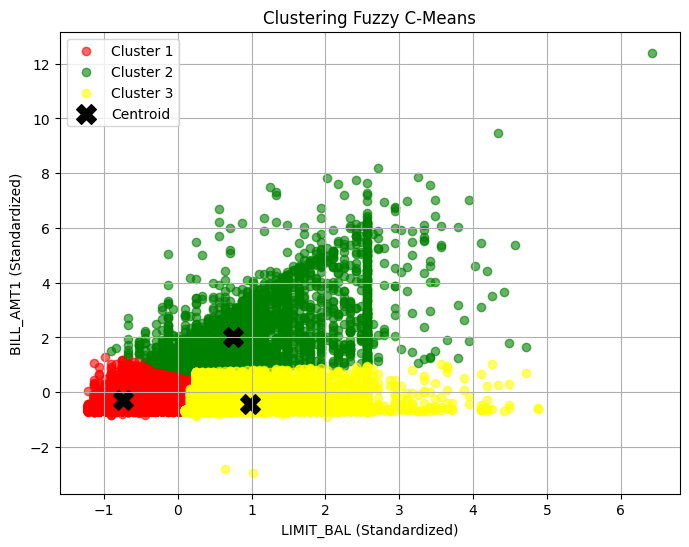

In [ ]:
# Visualisasi Clustering
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'yellow']

for i in range(3):
    plt.scatter(data_scaled[labels == i, 0], data_scaled[labels == i, 1],
                label=f'Cluster {i+1}', alpha=0.6, c=colors[i])

plt.scatter(cntr[:, 0], cntr[:, 1], marker='X', s=200, c='black', label='Centroid')

plt.xlabel('LIMIT_BAL (Standardized)')
plt.ylabel('BILL_AMT1 (Standardized)')
plt.title('Clustering Fuzzy C-Means')
plt.legend()
plt.grid(True)
plt.show()